In [12]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)


#verifica dei dati caricati
print(df.head())


Matplotlib is building the font cache; this may take a moment.


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [2]:
#Si richiede di verificare le dimensioni del dataset e i relativi metadati

#dimensioni dataset
print("Numero righe:", df.shape[0])
print("Numero colonne:", df.shape[1])


Numero righe: 429435
Numero colonne: 67


In [3]:
#metadati
df.info

<bound method DataFrame.info of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  tot

In [4]:
df.dtypes


iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [5]:
df.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [24]:
# 2.A: numero di casi fin dall'inizio della pandemia per ogni continente
continenti = ["Europe", "Asia", "Africa",
              "North America", "South America", "Oceania"]

casi_continente = (
    df[df["location"].isin(continenti)]
    .groupby("location")["total_cases"]
    .max()
    .sort_values(ascending=False)
)

print(casi_continente)


location
Asia             301499099.0
Europe           252916868.0
North America    124492666.0
South America     68809418.0
Oceania           15003352.0
Africa            13145380.0
Name: total_cases, dtype: float64


In [25]:
#2.B la percentuale rispetto al totale mondiale del numero di casi
totale_mondiale = (
    df[df["location"] == "World"]["total_cases"]
    .max()
)

percentuale_continente = (casi_continente / totale_mondiale) * 100

print(percentuale_continente.round(2))


location
Asia             38.86
Europe           32.60
North America    16.05
South America     8.87
Oceania           1.93
Africa            1.69
Name: total_cases, dtype: float64


In [9]:
"""Selezionare i dati relativi all'Italia nel 2022 e, 
poiché i nuovi casi vengono registrati settimanalmente, 
filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati:"""

#dati relativi all'Italia nel 2022 
italia = df[df["location"] == "Italy"].copy()

italia["date"] = pd.to_datetime(italia["date"])


In [10]:
#dati d'italia solo nel 2022
italia_2022 = italia[
    (italia["date"] >= "2022-01-01") &
    (italia["date"] <= "2022-12-31")
].copy()


In [11]:
#rimuovere i giorni senza dati
italia_2022 = italia_2022.dropna(subset=["new_cases"])
print("Numero righe dopo filtro:", italia_2022.shape[0])
print(italia_2022[["date", "new_cases"]].head())


Numero righe dopo filtro: 365
             date  new_cases
186002 2022-01-01        0.0
186003 2022-01-02   644604.0
186004 2022-01-03        0.0
186005 2022-01-04        0.0
186006 2022-01-05        0.0


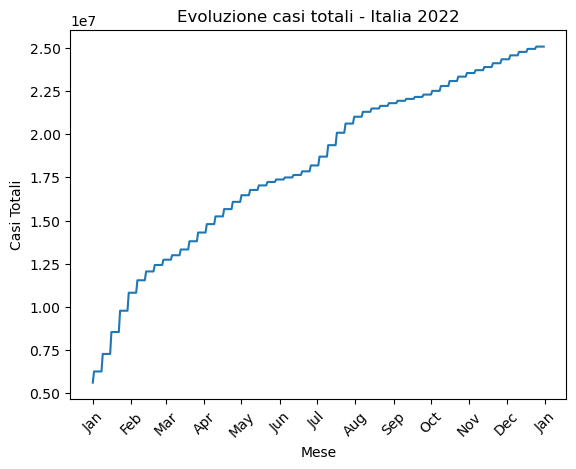

In [14]:
#3A evoluzion i casi totali 2022 grafico
import matplotlib.dates as mdates

plt.figure()

plt.plot(italia_2022["date"], italia_2022["total_cases"])

plt.title("Evoluzione casi totali - Italia 2022")
plt.xlabel("Mese")
plt.ylabel("Casi Totali")

# 🔹 Mostra solo i mesi
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.xticks(rotation=45)
plt.show()


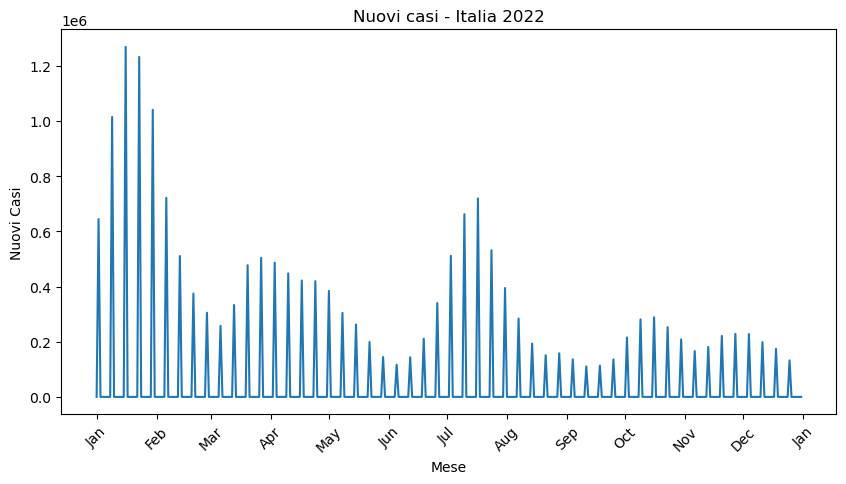

In [17]:
#3B numero di nuovi casi rispetto alla data

plt.figure(figsize=(10,5))
plt.plot(italia_2022["date"], italia_2022["new_cases"])
plt.title("Nuovi casi - Italia 2022")
plt.xlabel("Mese")
plt.ylabel("Nuovi Casi")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.xticks(rotation=45)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

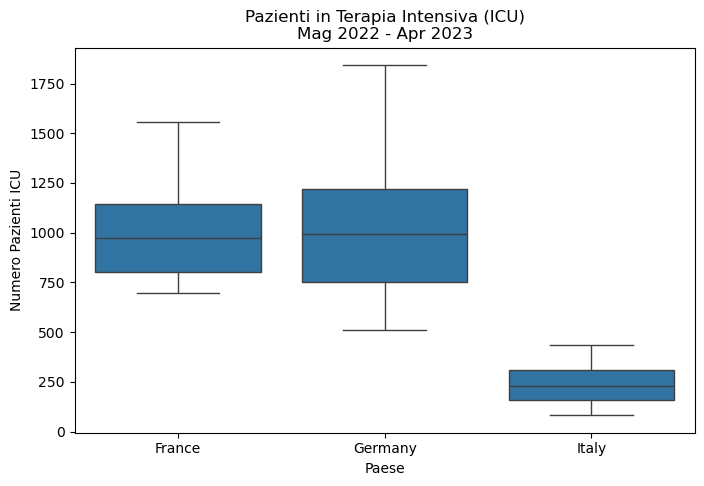

In [21]:
#4A per le nazioni Italia,Getmania,Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva 
#(Intensive Care Unit, ICU,considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)

import seaborn as sns
# Selezione paesi
paesi = ["Italy", "Germany", "France"]

# Filtro dati
icu_periodo = df[
    (df["location"].isin(paesi)) &
    (df["date"] >= "2022-05-01") &
    (df["date"] <= "2023-04-30")
].copy()

# Conversione data
icu_periodo["date"] = pd.to_datetime(icu_periodo["date"])

# Rimozione valori nulli
icu_periodo = icu_periodo.dropna(subset=["icu_patients"])

# Creazione boxplot
plt.figure(figsize=(8,5))

sns.boxplot(
    data=icu_periodo,
    x="location",
    y="icu_patients"
)

plt.title("Pazienti in Terapia Intensiva (ICU)\nMag 2022 - Apr 2023")
plt.xlabel("Paese")
plt.ylabel("Numero Pazienti ICU")

plt.show

In [ ]:
#4B
"""dal grafico possiamo vedere che in Germania la mediana dei pazienti in ICU risulta più elevata rispetto agli altri due Paesi, 
indicando un numero mediamente maggiore di ricoveri in terapia intensiva.
Invece in italia ha un numero nettamente inferiore rispetto gl'altri due paesi.


Somma pazienti ospedalizzati nel 2021:
location
France    6008717.0
Italy     4419950.0
Spain     2411706.0
Name: hosp_patients, dtype: float64


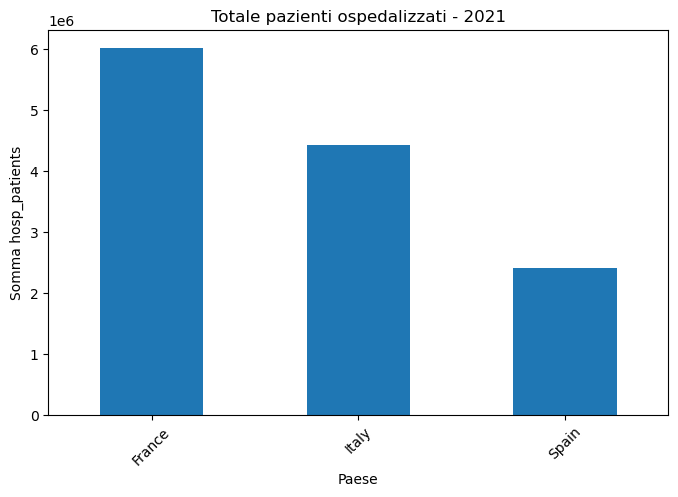

In [23]:
#5B Italia, Germania, Francia e Spagna in tutto il 2021:mostrare, in maniera grafica oppure numerica, 
#la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)

paesi = ["Italy", "Germany", "France", "Spain"]

# Filtro paesi + anno 2021
hosp_2021 = df[
    (df["location"].isin(paesi)) &
    (df["date"] >= "2021-01-01") &
    (df["date"] <= "2021-12-31")
].copy()

# Conversione data
hosp_2021["date"] = pd.to_datetime(hosp_2021["date"])


# Calcolo somma pazienti ospedalizzati
somma_hosp = (
    hosp_2021
    .dropna(subset=["hosp_patients"])
    .groupby("location")["hosp_patients"]
    .sum()
)

print("\nSomma pazienti ospedalizzati nel 2021:")
print(somma_hosp)

# Grafico a barre
plt.figure(figsize=(8,5))
somma_hosp.plot(kind="bar")

plt.title("Totale pazienti ospedalizzati - 2021")
plt.xlabel("Paese")
plt.ylabel("Somma hosp_patients")

plt.xticks(rotation=45)
plt.show()


In [ ]:
#5B 
""" sostituire i dati con il zero non sarebbe appropriato, perché non sempre il dato 0 significa che ci siano 0 pazienti ma può essere un dato mancante.
Anche la sostituzione con media o interpolazione potrebbe alterare l’analisi, trattandosi di dati cumulativi giornalieri.
quindi ho escluso i valori nulli dal calcolo della somma per evitare distorsioni."""